## **CAR INSURANCE ANALYSIS**

**LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING RAW DATA**

In [9]:
df = pd.read_csv("C:/Users/Sheik Danish/Downloads/insurance_policies_data.csv")

**DATA INFO**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37542 entries, 0 to 37541
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                37541 non-null  object 
 1   BirthDate         37542 non-null  object 
 2   Car_Color         37542 non-null  object 
 3   Car_Company       37542 non-null  object 
 4   Car_Model         37542 non-null  object 
 5   Car_Use           37542 non-null  object 
 6   Car_Year          37542 non-null  int64  
 7   Coverage_Zone     37542 non-null  object 
 8   Education         37542 non-null  object 
 9   Gender            37542 non-null  object 
 10  Marital_Status    37542 non-null  object 
 11  Parent            37542 non-null  object 
 12  Claim_Amount      37542 non-null  float64
 13  Claim_Freq        37542 non-null  int64  
 14  Household_Income  37542 non-null  int64  
 15  Kids_Driving      37542 non-null  int64  
dtypes: float64(1), int64(4), object(11)
memo

In [12]:
df.head(10)

,ID,BirthDate,Car_Color,Car_Company,Car_Model,Car_Use,Car_Year,Coverage_Zone,Education,Gender,Marital_Status,Parent,Claim_Amount,Claim_Freq,Household_Income,Kids_Driving
0,62-2999778,09-08-1965,Green,Acura,TSX,Private,2017,Highly Urban,High School,Male,Single,Yes,7375.988,1,220437,2
1,70-2426103,21-04-1991,Turquoise,Corbin,Sparrow,Private,2011,Urban,Bachelors,Female,Married,No,7897.541,1,66491,0
2,08-3808219,08-03-2002,Orange,Nissan,Pathfinder,Private,2000,Rural,Bachelors,Male,Divorced,No,3090.401,0,56123,0
3,38-0306843,10-05-1962,Pink,Ford,Econoline E350,Private,2007,Highly Urban,Bachelors,Female,Single,No,3025.782,1,175183,0
4,47-5163637,15-01-1995,Green,Nissan,350Z,Commercial,2013,Rural,Masters,Male,Single,No,5043.402,3,137110,0
5,07-4760971,06-11-1966,Maroon,Mercedes-Benz,CLK-Class,Private,2006,Rural,PhD,Male,Single,Yes,7193.514,3,212072,1
6,36-8207139,27-08-2002,Yellow,Toyota,Matrix,Private,2013,Rural,High School,Male,Single,No,2161.115,0,87876,0
7,57-6123340,26-02-1983,Crimson,Lincoln,Continental Mark VII,Private,1996,Highly Rural,Bachelors,Male,Married,No,2444.774,2,167681,0
8,47-9063798,06-10-1953,Goldenrod,Mazda,323,Private,2002,Rural,High School,Male,Single,Yes,4043.712,0,116305,2
9,92-8406214,18-12-1995,Red,Ford,F350,Private,2001,Suburban,High School,Female,Single,No,3211.983,0,111742,0


In [6]:
df.isnull().sum()

ID                  1
BirthDate           0
Car_Color           0
Car_Company         0
Car_Model           0
Car_Use             0
Car_Year            0
Coverage_Zone       0
Education           0
Gender              0
Marital_Status      0
Parent              0
Claim_Amount        0
Claim_Freq          0
Household_Income    0
Kids_Driving        0
dtype: int64

**SIZE OF DATA**

In [7]:
df.shape

(37542, 16)

**DATA TYPES**

In [8]:
df.dtypes

ID                   object
BirthDate            object
Car_Color            object
Car_Company          object
Car_Model            object
Car_Use              object
Car_Year              int64
Coverage_Zone        object
Education            object
Gender               object
Marital_Status       object
Parent               object
Claim_Amount        float64
Claim_Freq            int64
Household_Income      int64
Kids_Driving          int64
dtype: object

In [9]:
df.nunique()

ID                  37541
BirthDate           16517
Car_Color              19
Car_Company            78
Car_Model            1011
Car_Use                 2
Car_Year               64
Coverage_Zone           5
Education               4
Gender                  2
Marital_Status          4
Parent                  2
Claim_Amount        37474
Claim_Freq              5
Household_Income    34227
Kids_Driving            4
dtype: int64

**BUSINESS REQUIREMENT**

**KPI"S**

In [18]:
#total sales
Total_Claim_Amt = df['Claim_Amount'].sum()
print(f"Total Claim Amount: ${Total_Claim_Amt:,.1f}")

#Total Polices 
Total_Polices = df['ID'].count()
print(f"Total Polices: {Total_Polices:,.1f}K")

#Average Claim Frequency
Avg_Claim_Freq = df['Claim_Freq'].mean()
print(f"Average Claim Frequency: {Avg_Claim_Freq:,.1f}")

#Total Male
Total_male = (df['Gender'] == 'Male').sum()
print(f"Total Males:{Total_male:,.1f}")

#Total Female
Total_Female = (df['Gender'] == 'Female').sum()
print(f"Total Females:{Total_Female:,.1f}")


Total Claim Amount: $187,817,047.6
Total Polices: 37,541.0K
Average Claim Frequency: 0.5
Total Males:18,736.0
Total Females:18,806.0


# **Charts Requeriment** #

****Total Claim Amt By Car Use****

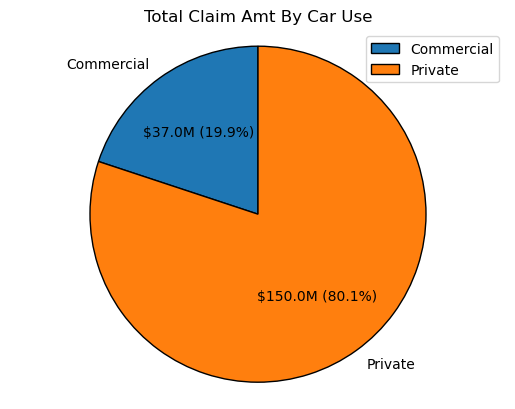

In [25]:
Claim_amt_car = df.groupby('Car_Use')['Claim_Amount'].sum()
def autopct_format(values):
    total = sum(values)

    def show_value(pct):
        value = int(pct * total/100000000) 
        return f"${value:.1f}M ({pct:.1f}%)"
    return show_value
plt.pie(Claim_amt_car,labels = Claim_amt_car.index,autopct = autopct_format(Claim_amt_car),startangle = 90,
       wedgeprops = {'edgecolor':'black'}
       )
plt.title("Total Claim Amt By Car Use")
plt.legend()
plt.axis("equal")
plt.show()

**Total Polices By Car Use**

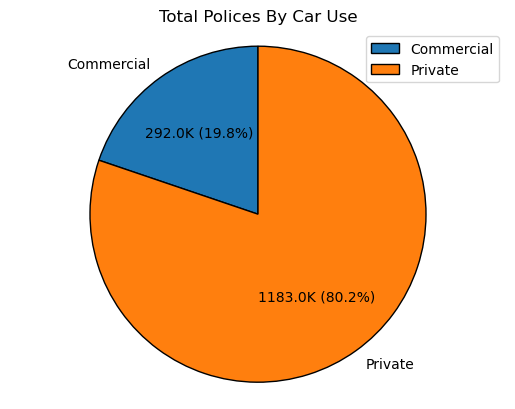

In [39]:
Claim_amt_car = df.groupby('Car_Use')['ID'].count()
def autopct_format(values):
    total = sum(values)

    def show_value(pct):
        value = int(pct * total/1000)
        return f"{value:.1f}K ({pct:.1f}%)"
    return show_value
plt.pie(Claim_amt_car.values,labels = Claim_amt_car.index,
        autopct = autopct_format(Claim_amt_car),startangle = 90,
       wedgeprops = {'edgecolor':'black'})
plt.title("Total Polices By Car Use")
plt.legend()
plt.axis("equal")
plt.show()

**Total Claim Amt By Car Comapany**

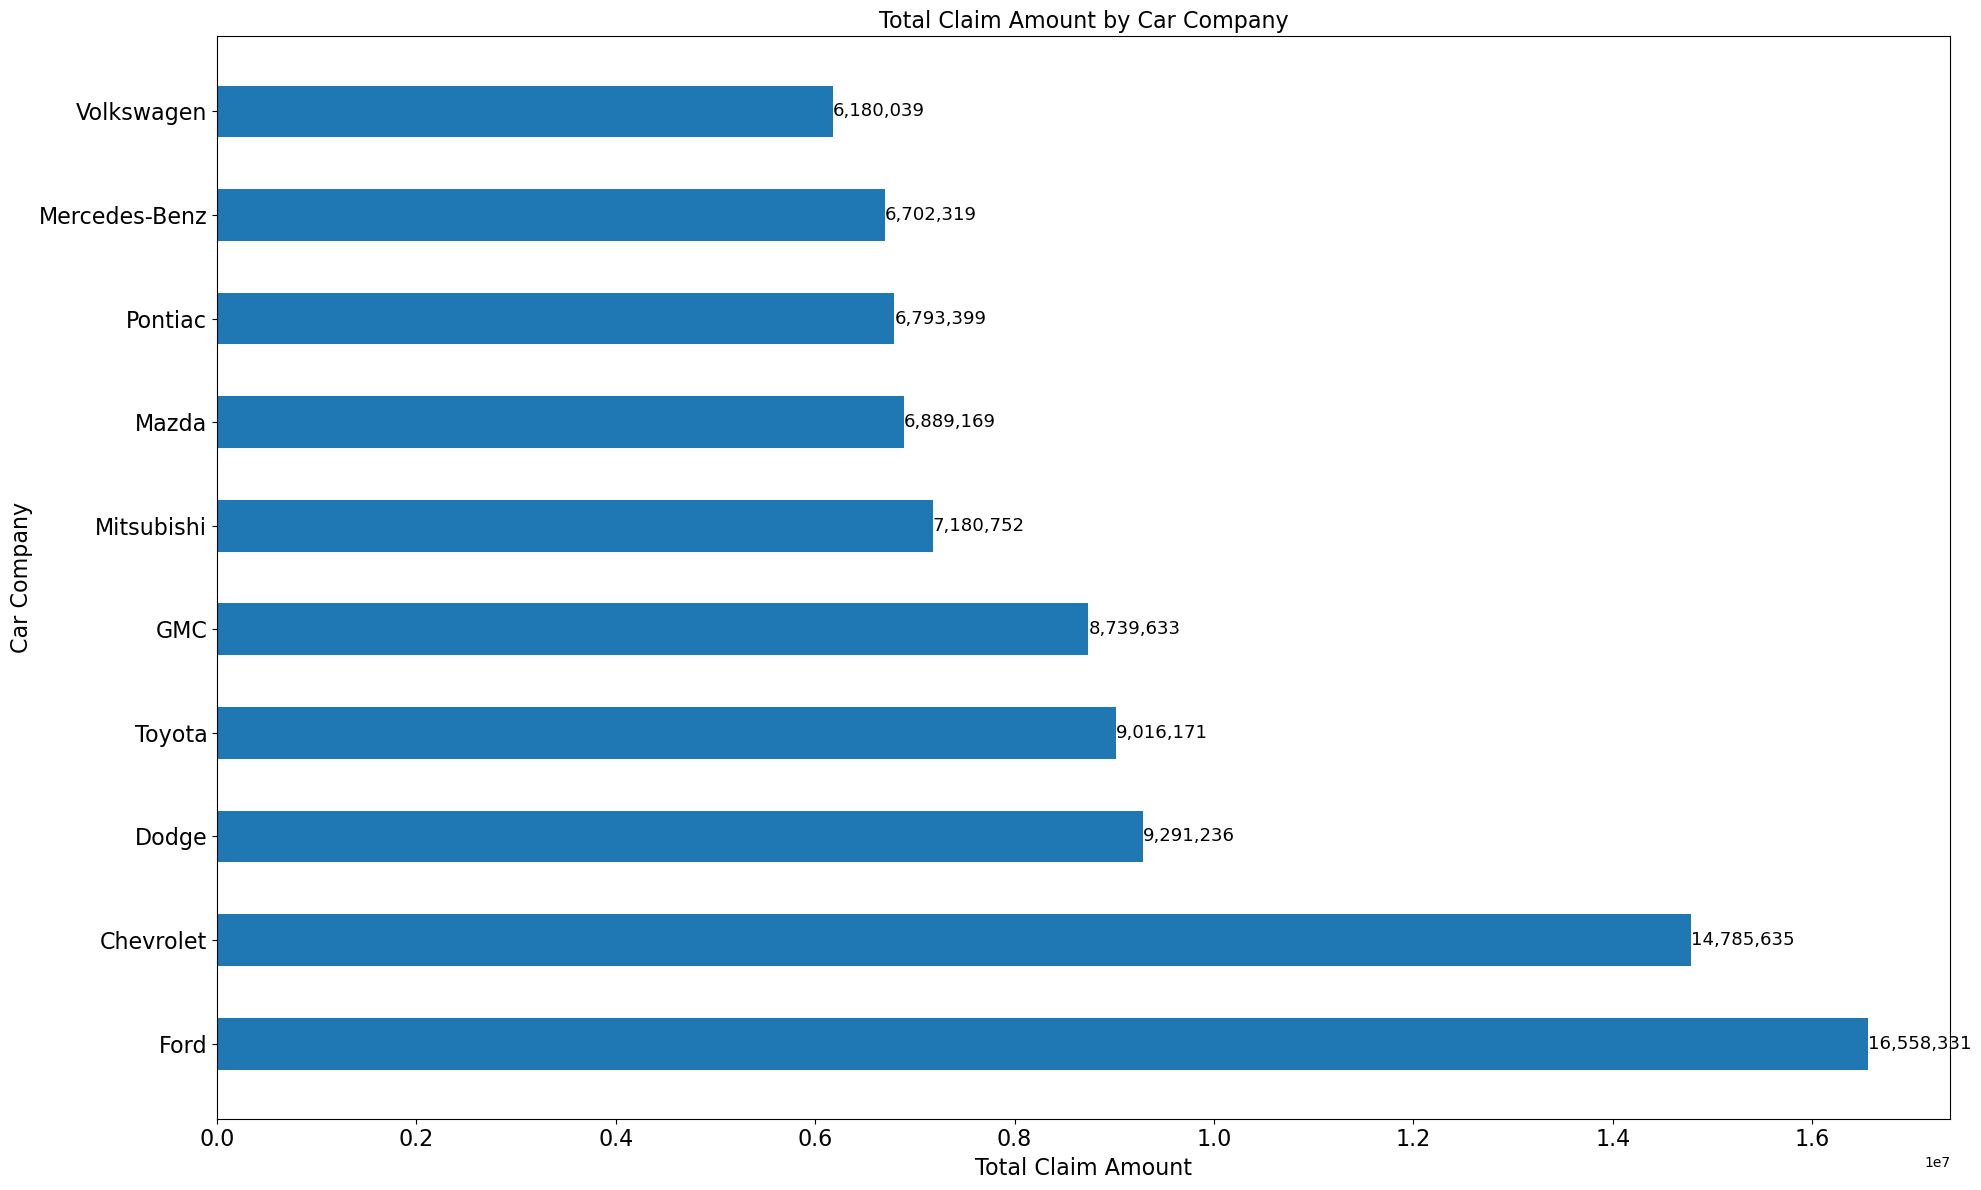

In [21]:
Claim_amt_Car_Com = df.groupby('Car_Company')['Claim_Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 12))
bars = plt.barh(
    Claim_amt_Car_Com.index,Claim_amt_Car_Com.values,height=0.5)
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{int(bar.get_width()):,}",va='center',ha='left',fontsize=13)
plt.xlabel("Total Claim Amount",fontsize=16)
plt.ylabel("Car Company",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Total Claim Amount by Car Company",fontsize=16)
plt.tight_layout()
plt.show()


**Total Polices By Car Comapany**

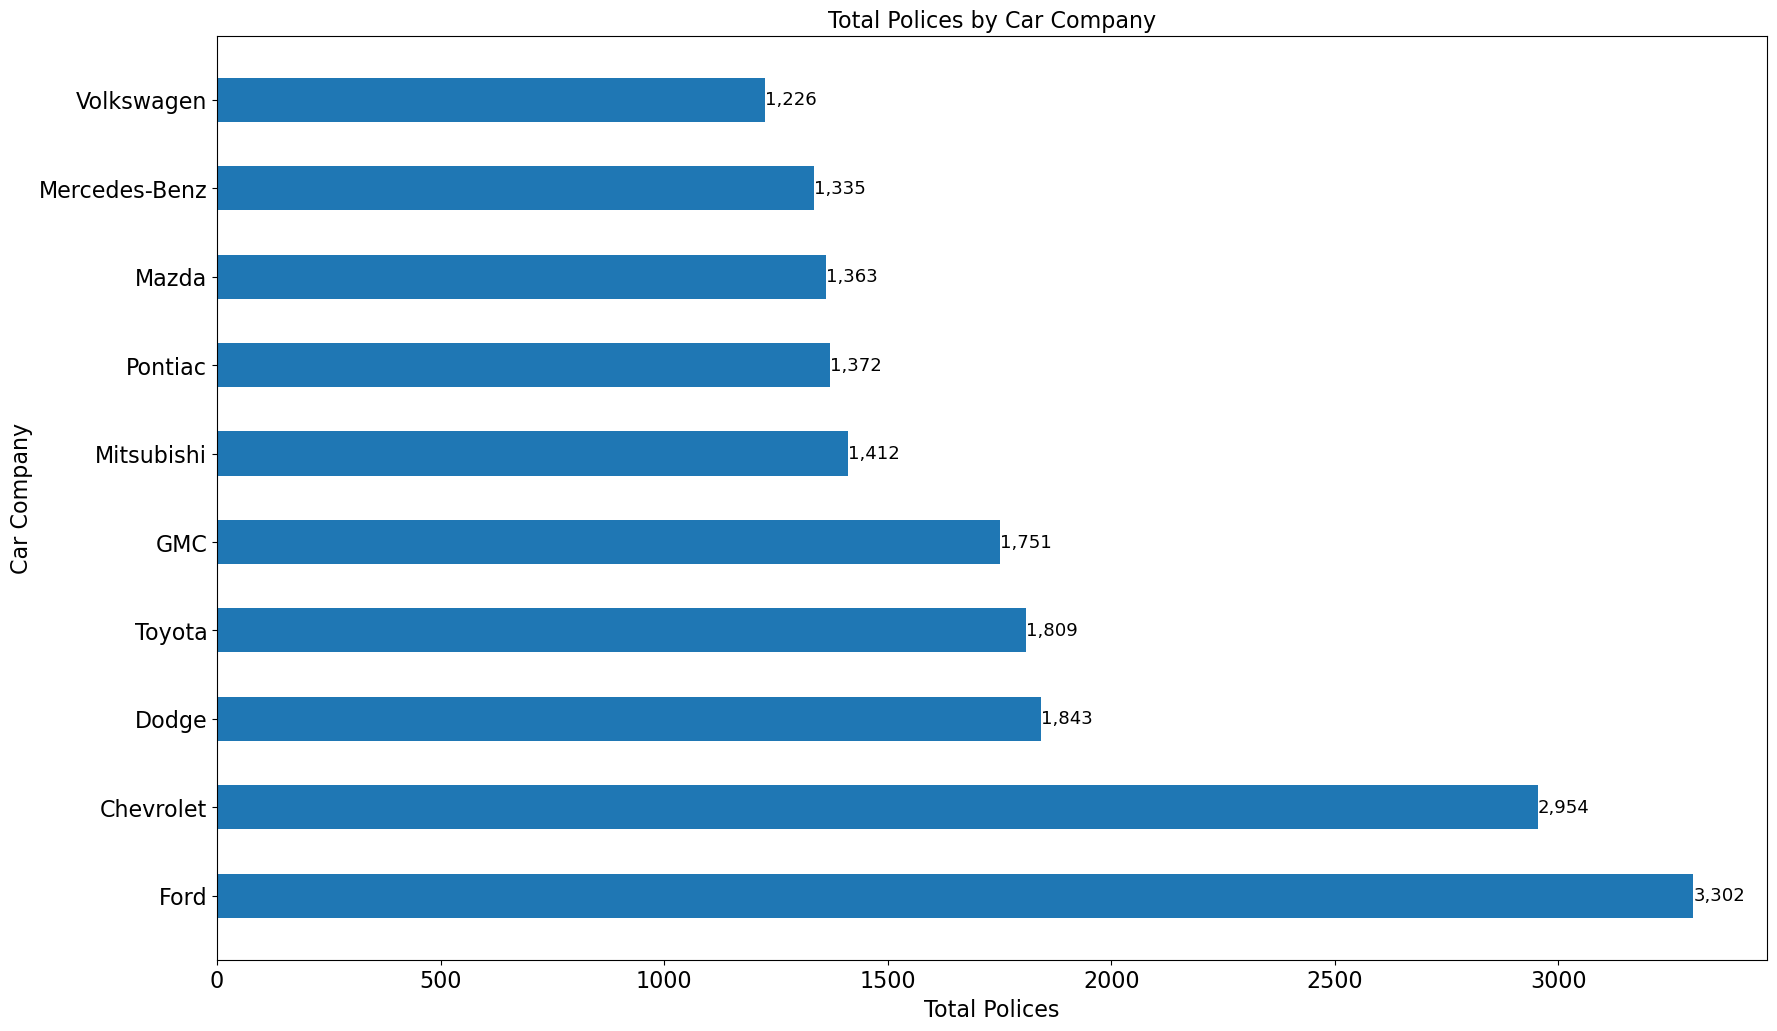

In [22]:
Claim_amt_Car_Com = df.groupby('Car_Company')['ID'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 12))
bars = plt.barh(Claim_amt_Car_Com.index,Claim_amt_Car_Com.values,height=0.5)
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{int(bar.get_width()):,}",va='center',ha='left',fontsize=13)
plt.xlabel("Total Polices",fontsize=16)
plt.ylabel("Car Company",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Total Polices by Car Company",fontsize=16)
plt.show()


**Total Claim Amt By Car Coverage Zone**

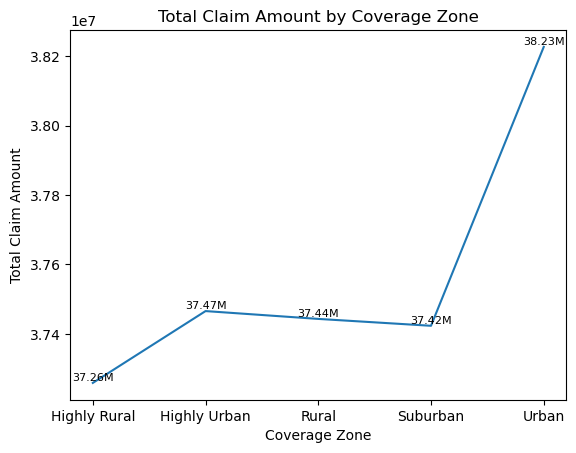

In [15]:
Claim_amt_car = df.groupby('Coverage_Zone')['Claim_Amount'].sum().reset_index()
ax = sns.lineplot(x='Coverage_Zone',y='Claim_Amount',data = Claim_amt_car)
for i in range(len(Claim_amt_car)):
    ax.text(i,Claim_amt_car['Claim_Amount'][i],
        f"{Claim_amt_car['Claim_Amount'][i]/1e6:.2f}M",
        ha='center',va='bottom',fontsize=8)
plt.title("Total Claim Amount by Coverage Zone")
plt.xlabel("Coverage Zone")
plt.ylabel("Total Claim Amount")
plt.show()



**Total Polices By Car Coverage Zone**

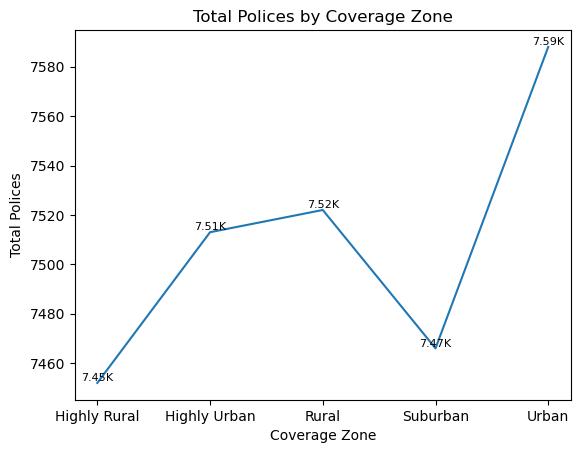

In [16]:
Claim_amt_car = df.groupby('Coverage_Zone')['ID'].count().reset_index()
ax = sns.lineplot(x='Coverage_Zone',y='ID',data = Claim_amt_car)
for i in range(len(Claim_amt_car)):
    ax.text(i,Claim_amt_car['ID'][i],
        f"{Claim_amt_car['ID'][i]/1000:.2f}K",
        ha='center',va='bottom',fontsize=8)
plt.title("Total Polices by Coverage Zone")
plt.xlabel("Coverage Zone")
plt.ylabel("Total Polices")
plt.show()



**Total Policies by Car Year (1990–2000)**

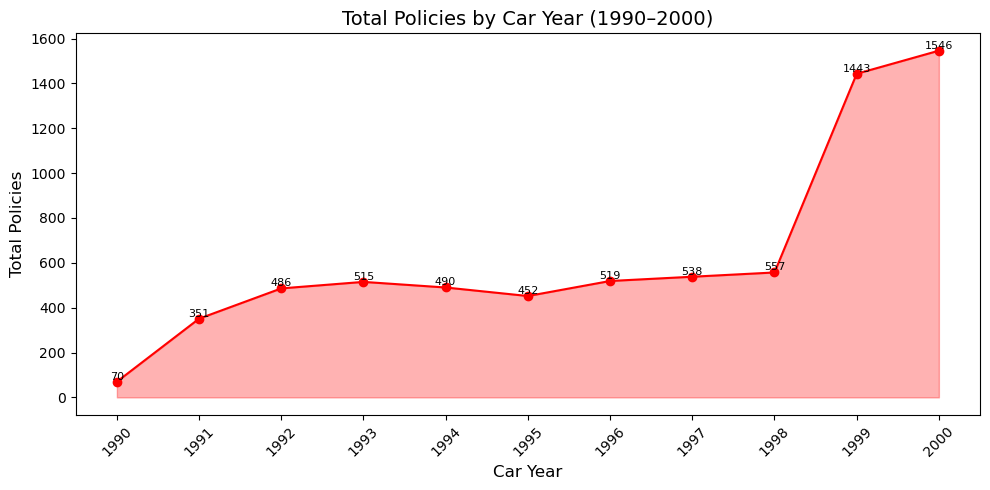

In [17]:
df_1990_2000 = df[(df['Car_Year'] >= 1990) &(df['Car_Year'] <= 2000)]
area_data = (df_1990_2000.groupby('Car_Year')['ID'].count().reset_index())
x = np.arange(len(area_data))
plt.figure(figsize=(10, 5))

plt.plot(x,area_data['ID'],marker='o',color='red')

plt.fill_between( x,area_data['ID'],color='red',alpha=0.3)
for i in range(len(area_data)):
    plt.text(x[i],area_data['ID'][i],str(area_data['ID'][i]),
        ha='center',va='bottom',fontsize=8)
plt.xticks(x, area_data['Car_Year'], rotation=45)
plt.title("Total Policies by Car Year (1990–2000)", fontsize=14)
plt.xlabel("Car Year", fontsize=12)
plt.ylabel("Total Policies", fontsize=12)
plt.tight_layout()
plt.show()


**Total Claim Amount by Car Year (1990–2000)**

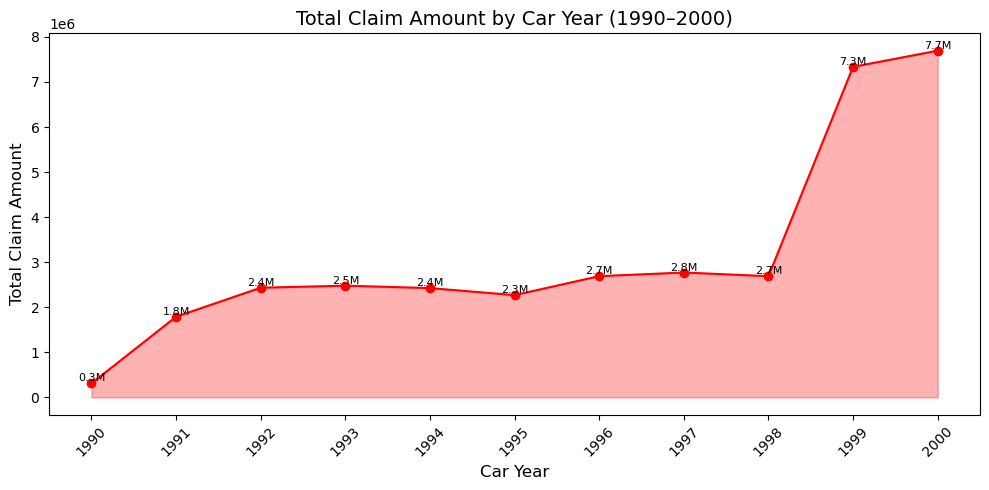

In [19]:
df_1990_2000 = df[(df['Car_Year'] >= 1990) &(df['Car_Year'] <= 2000)]

area_data = (df_1990_2000.groupby('Car_Year')['Claim_Amount'].sum().reset_index())
x = np.arange(len(area_data))
plt.figure(figsize=(10, 5))
plt.plot(x, area_data['Claim_Amount'], marker='o', color='red')
plt.fill_between(x, area_data['Claim_Amount'], color='red', alpha=0.3)
for i in range(len(area_data)):
    plt.text(x[i],area_data['Claim_Amount'][i],
        f"{area_data['Claim_Amount'][i]/1e6:.1f}M",
        ha='center',va='bottom',fontsize=8)
plt.xticks(x, area_data['Car_Year'], rotation=45)
plt.title("Total Claim Amount by Car Year (1990–2000)", fontsize=14)
plt.xlabel("Car Year", fontsize=12)
plt.ylabel("Total Claim Amount", fontsize=12)
plt.tight_layout()
plt.show()


**Total Claim Amount by Age Group**

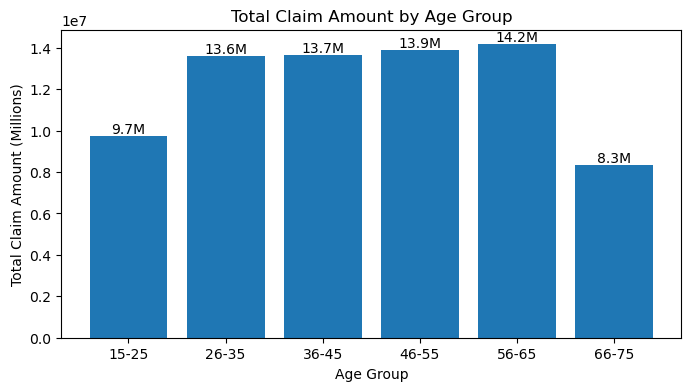

In [25]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'], errors='coerce')
df = df.dropna(subset=['BirthDate']).copy()
REFERENCE_YEAR = 2024
df.loc[:, 'Age'] = REFERENCE_YEAR - df['BirthDate'].dt.year
df.loc[:, 'Age_Group'] = pd.cut(df['Age'],
    bins=[15, 25, 35, 45, 55, 65, 75],
    labels=['15-25', '26-35', '36-45', '46-55', '56-65', '66-75'])
age_claim = (df.groupby('Age_Group', observed=False)['Claim_Amount'].sum().reset_index())
plt.figure(figsize=(8, 4))
bars = plt.bar(age_claim['Age_Group'], age_claim['Claim_Amount'])
for bar in bars:
    value = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        value,
        f"{value/1e6:.1f}M",ha='center',va='bottom',fontsize=10)

plt.title("Total Claim Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Claim Amount")
plt.show()


**Total Policies by Age Group**

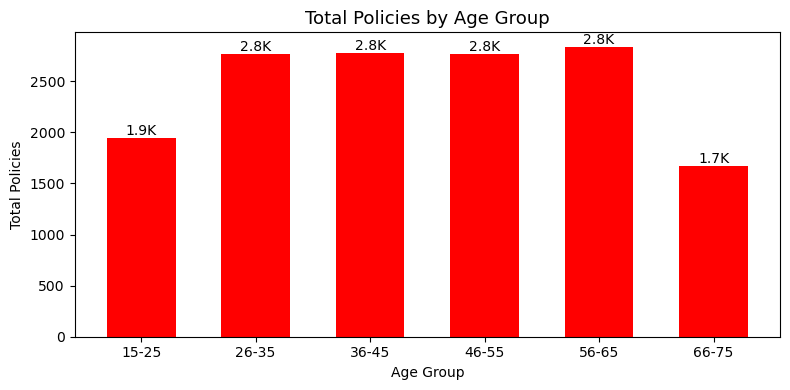

In [33]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'], errors='coerce')
df = df.dropna(subset=['BirthDate']).copy()
REFERENCE_YEAR = 2024
df.loc[:, 'Age'] = REFERENCE_YEAR - df['BirthDate'].dt.year

df.loc[:, 'Age_Group'] = pd.cut(df['Age'],bins=[15, 25, 35, 45, 55, 65, 75],
    labels=['15-25', '26-35', '36-45', '46-55', '56-65', '66-75'])

age_policy = (df.groupby('Age_Group', observed=False)['ID'].count().reset_index())

plt.figure(figsize=(8, 4))
bars = plt.bar(age_policy['Age_Group'],
    age_policy['ID'],
    width=0.6,color ='red')

for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
        value,f"{int(value)/1000:.1f}K",
        ha='center',
        va='bottom',
        fontsize=10)

plt.title("Total Policies by Age Group", fontsize=13)
plt.xlabel("Age Group")
plt.ylabel("Total Policies")
plt.tight_layout()
plt.show()


**Total Policies by Education Level**


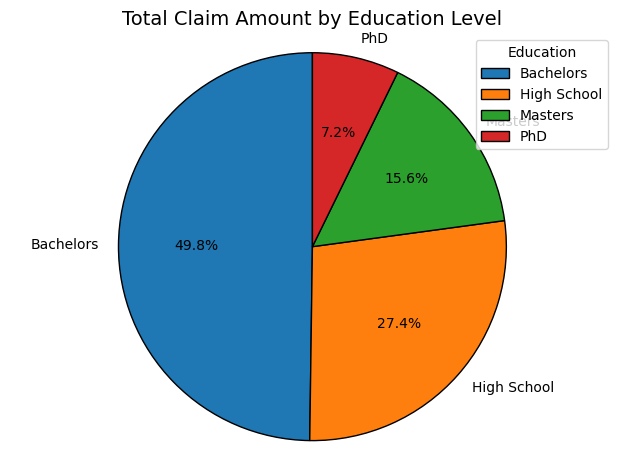

In [41]:
Total_claim_Edu = df.groupby('Education')['Claim_Amount'].sum()
plt.pie(
    Total_claim_Edu.values,
    labels=Total_claim_Edu.index,
    autopct = '%.1f%%',startangle = 90,
       wedgeprops = {'edgecolor':'black'})
plt.title("Total Claim Amount by Education Level", fontsize=14)
plt.legend(Total_claim_Edu.index,title="Education",loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


**Total Polices  by Education Level**

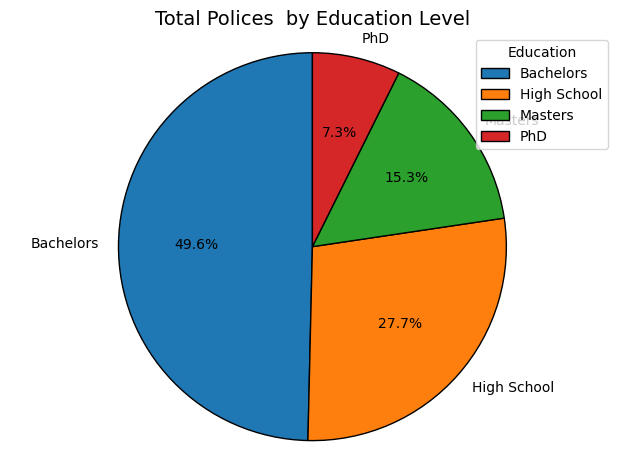

In [42]:
Total_claim_Edu = df.groupby('Education')['ID'].count()
plt.pie(
    Total_claim_Edu.values,
    labels=Total_claim_Edu.index,
    autopct = '%.1f%%',startangle = 90,
       wedgeprops = {'edgecolor':'black'})
plt.title("Total Polices  by Education Level", fontsize=14)
plt.legend(Total_claim_Edu.index,title="Education",loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


**Claim Amount by Education and Marital Status**

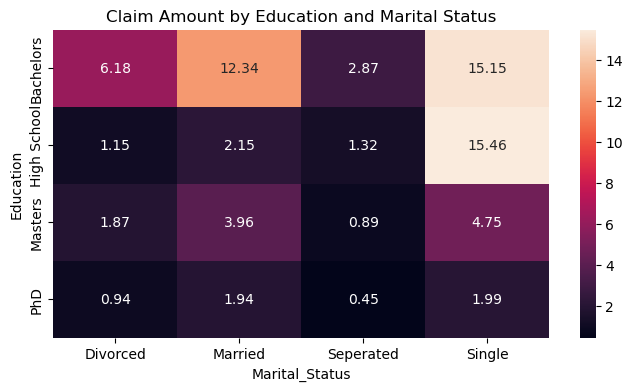

In [56]:
table = df.pivot_table(values='Claim_Amount',
    index='Education',
    columns='Marital_Status',
    aggfunc='sum')
table = table / 1e6

plt.figure(figsize=(8, 4))
sns.heatmap(
    table,annot=True,
    fmt=".2f",)

plt.title("Claim Amount by Education and Marital Status")

plt.show()


**Total Policies by Education and Marital Status**


C:\Users\Sheik Danish\AppData\Local\Temp\ipykernel_15644\1710849945.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(table,annot=table.applymap(lambda x: f"{x:.2f}K"),fmt="",


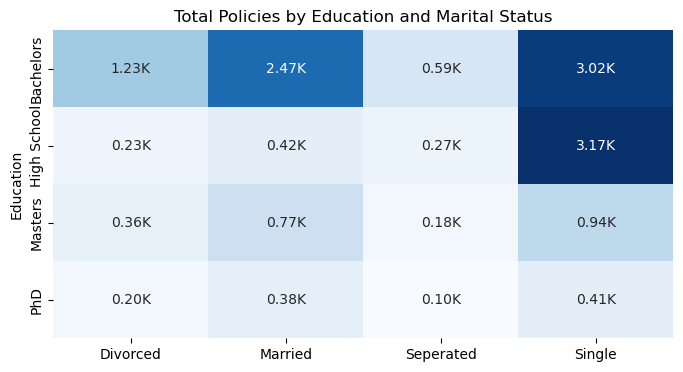

In [67]:
table = df.pivot_table( values='ID',
    index='Education',
    columns='Marital_Status',aggfunc='count')
table = table / 1000
plt.figure(figsize=(8, 4))
sns.heatmap(table,annot=table.applymap(lambda x: f"{x:.2f}K"),fmt="",
    cmap="Blues",
    cbar=False)
plt.title("Total Policies by Education and Marital Status")
plt.xlabel("")
plt.ylabel("Education")
plt.show()




**Top 10 Car Companies by Claim Amount**

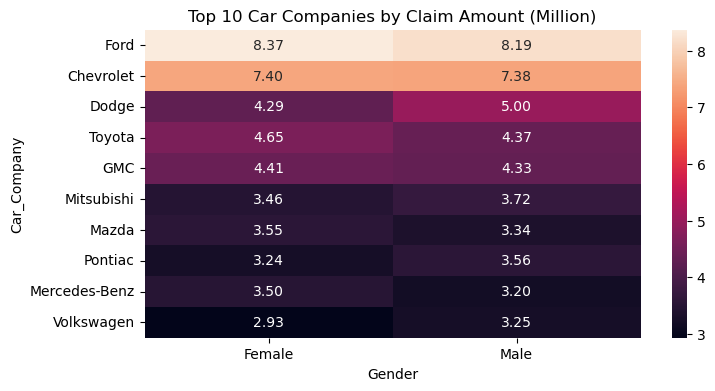

In [27]:
# Pivot table
table = df.pivot_table(values='Claim_Amount',
    index='Car_Company',
    columns='Gender',aggfunc='sum')

table = table.loc[table.sum(axis=1).nlargest(10).index] / 1e6
plt.figure(figsize=(8, 4))
sns.heatmap(table, annot=True, fmt=".2f")
plt.title("Top 10 Car Companies by Claim Amount (Million)")
plt.show()


**Top 10 Car Companies by Total Policies**

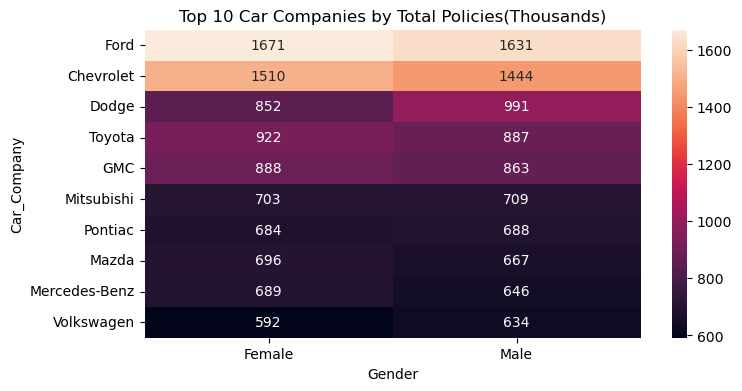

In [30]:
table = df.pivot_table(values='ID',
    index='Car_Company',
    columns='Gender',
    aggfunc='count'
)
table = table.loc[table.sum(axis=1).nlargest(10).index]
plt.figure(figsize=(8, 4))
sns.heatmap(table, annot=True, fmt=".0f")

plt.title("Top 10 Car Companies by Total Policies(Thousands)")
plt.show()


**Total Claim Amount By Color**

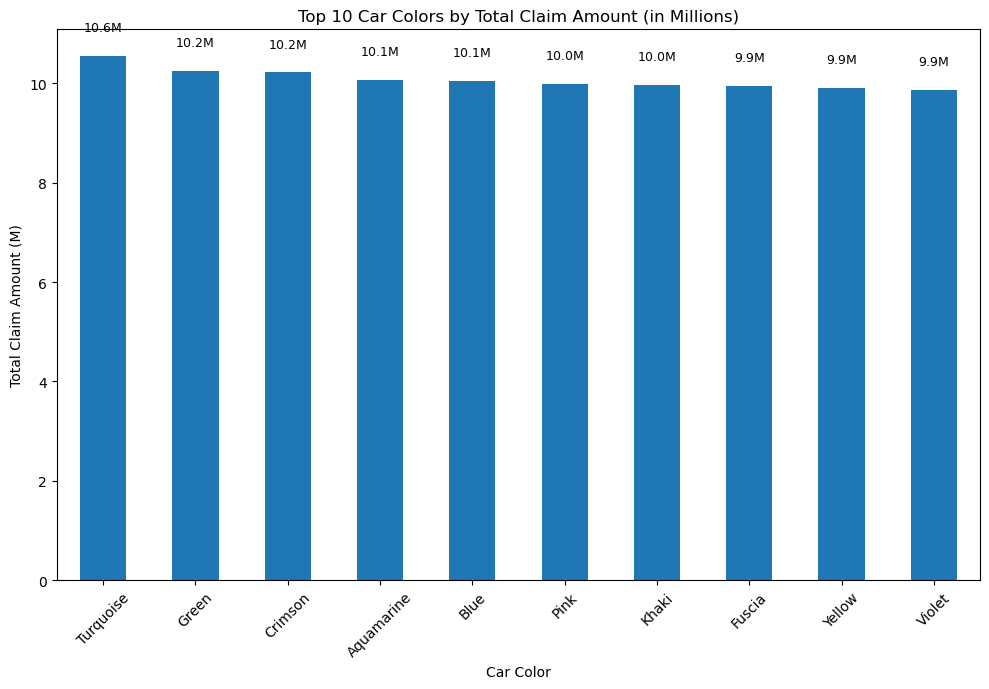

In [55]:
data = (
    df.groupby('Car_Color')['Claim_Amount']
      .sum()
      .sort_values(ascending=False).head(10))


data_m = data / 1e6
plt.figure(figsize=(10, 7))
ax = data_m.plot(kind='bar')
plt.title("Top 10 Car Colors by Total Claim Amount (in Millions)")
plt.xlabel("Car Color")
plt.ylabel("Total Claim Amount (M)")
for i, value in enumerate(data_m):
    ax.text(i, value + 0.5, f"{value:.1f}M", ha='center',  fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Total Polices By Color**

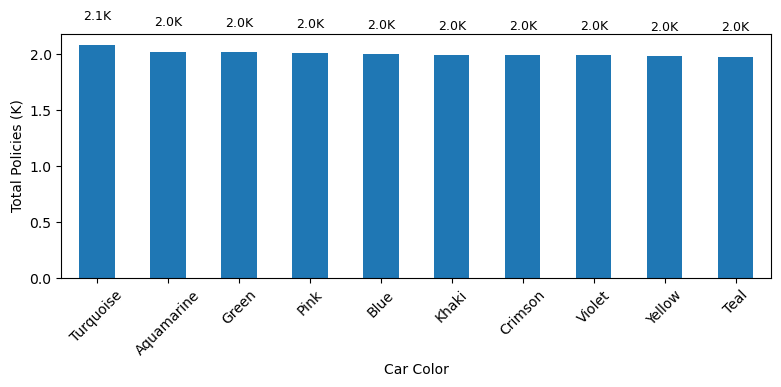

In [66]:
data = (df['Car_Color'].value_counts()
    .head(10)
)

data_k = data / 1000

plt.figure(figsize=(8, 4))
ax = data_k.plot(kind='bar')
plt.xlabel("Car Color")
plt.ylabel("Total Policies (K)")

for i, value in enumerate(data_k):
    ax.text(i, value + 0.2, f"{value:.1f}K", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
